In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('Crop_Recommendation.csv')

In [6]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
data.size

17600

In [8]:
data.shape

(2200, 8)

In [9]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

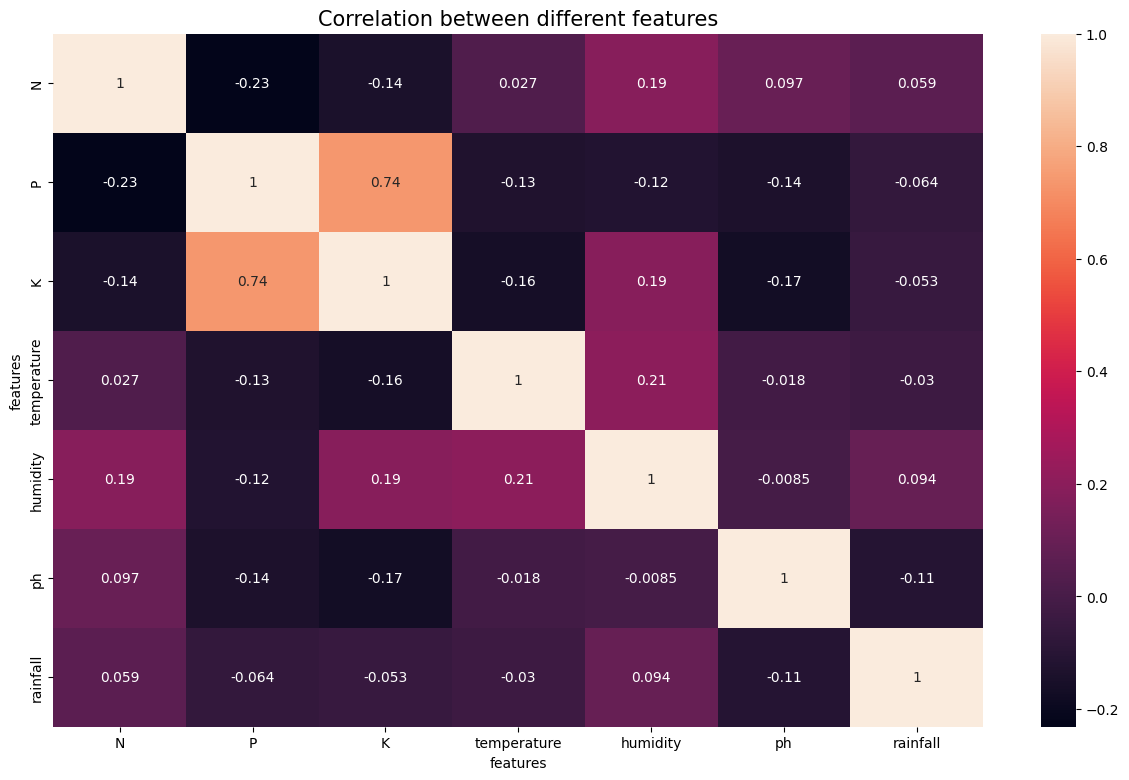

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [15]:
X = data.drop('label', axis=1)
y = data['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0)

In [32]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
result = GradientBoostingClassifier(n_estimators=45)
result.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=45)

In [19]:
y_pred=result.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Model accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 98.64


In [34]:
print('Training set score: {:.4f}'.format(result.score(X_train, y_train)*100))
print('Test set score: {:.4f}'.format(result.score(X_test, y_test)*100))

Training set score: 100.0000
Test set score: 98.6364


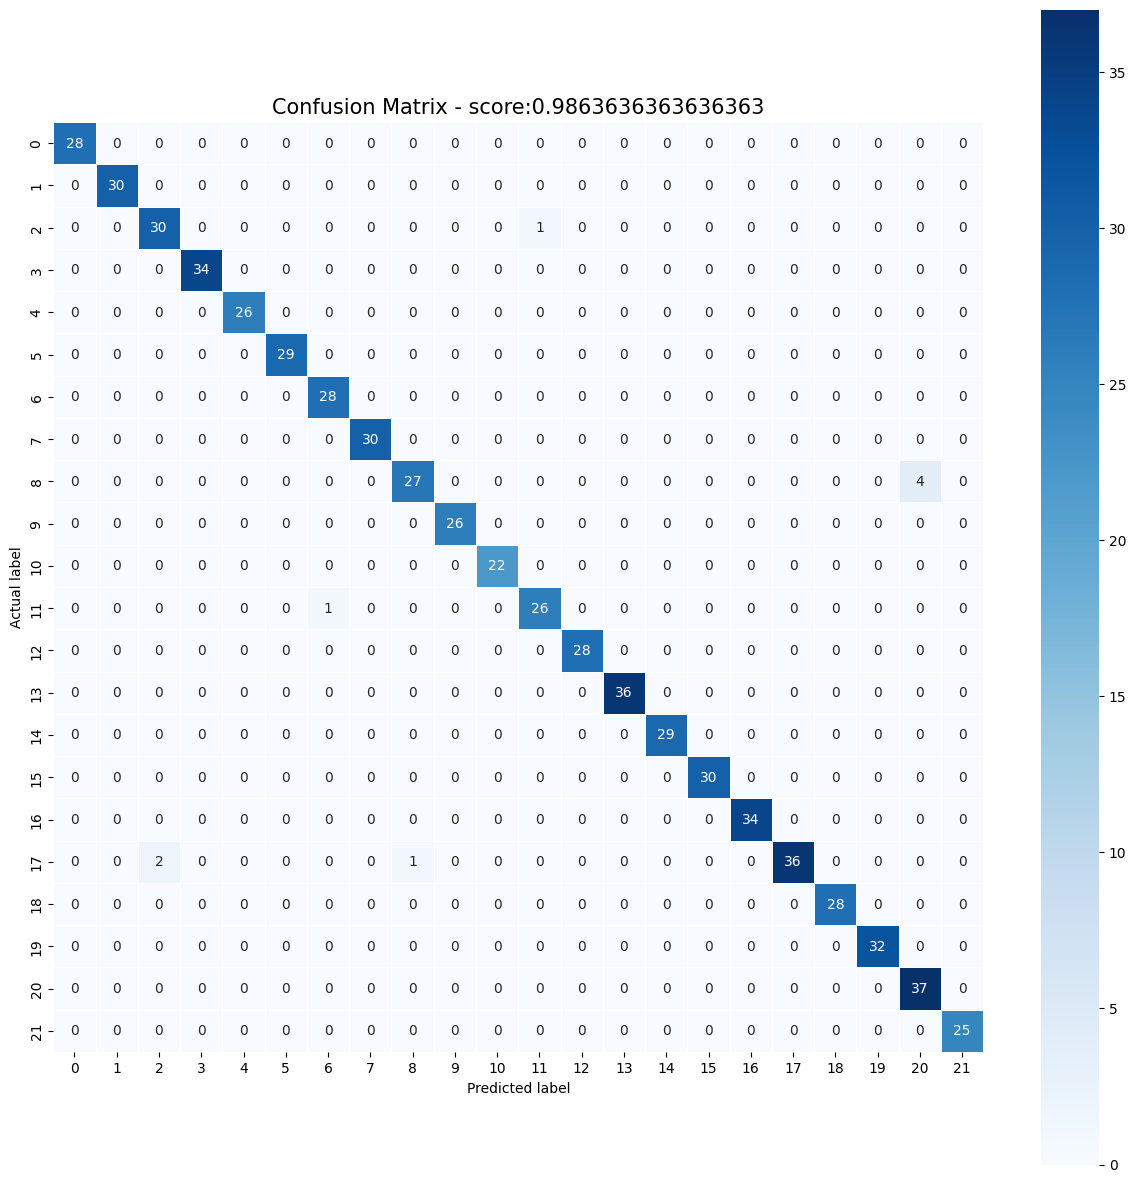

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.94      0.97      0.95        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      0.96      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [37]:
prediction=result.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
print(prediction)

['rice']


In [39]:
pickle.dump(result,open('Crop_Recommendation.pkl','wb'))
model=pickle.load(open('Crop_Recommendation.pkl','rb'))